In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df_path= Path('/Users/khashayarzare/Desktop/Carleton University/Capstone 2024/data/ngs-81M0011-E-2018_F1.dta')

In [3]:

df = pd.read_stata(df_path, convert_categoricals=False)


/var/folders/kl/j44n1f9551gb0b57c2h4xbh40000gn/T/ipykernel_1361/2860887416.py:1: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df = pd.read_stata(df_path, convert_categoricals=False)


In [24]:
pd.set_option('display.max_columns', None)
df.head(10)

,PUMFID,gender,PGM_034,PGM_P036,work_placement,PGM_280A,PGM_280B,PGM_280C,PGM_280D,PGM_280E,entrep,PGM_290,PGM_350,PGM_380,PGM_P400,gpa,PGM_410,PGM_415,PGM_430,PGM_440,EDU_010,EDU_020,student_loan,STL_020,STL_030,STL_080,STL_100A,STL_100B,STL_100C,STL_100D,STL_130,STL_150,STL_160B,STL_160C,STL_160D,STL_160E,STL_160F,STL_160G,STL_160H,STL_160I,STL_160J,STL_160L,STLP160N,STL_170A,STL_170B,STL_170C,STL_170D,STL_170E,STL_170F,STL_170G,STL_170H,STL_170I,STL_170J,STL_170L,STLP170N,STL_190,LFW_010,LFW_P020,LFW_120,LFW_P140,LFW_270,LFW_280,LFW_370,LFW_400,LFW_410,LFW_420A,LFW_420B,LFW_420C,LFW_440,AFT_P010,AFT_020,AFT_P040,AFT_050,AFT_070,AFT_080,AFT_090,BEF_P140,BEF_P150,BEF_160,DEM_P010,DEM_P030,DEM_P140,GRADAGEP,REG_INST,cert_lvl,program,COOP,PREVLEVP,HLOSGRDP,HLOSINTP,STULOANS,OWESLGD,OWEGVIN,SRCFUND,RESP,SCHOLAR,DBTOTGRD,DBTOTINT,DBTALGRD,DBTALINT,LFSTAT,LFCINDP,occup,LFWFTPT1,JOBQLEVP,JOBQLGRD,JOBQLINT,JOBINCP,income,REG_RESP,VISBMINP,CTZSHIPP,LHOMEP,LFIRSTP,FATHEDP,FATEDGRD,FATEDINT,MOTHEDP,MOTEDGRD,MOTEDINT,DDIS_FL,DTYPERP,DCLASSP,WTPF,rel_educ,gpa_new,fitted,inst_rep,_est_est1,yhat
0,28113,2,1.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,NaN,1.0,1.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,NaN,2.0,1.0,2.0,2.0,6.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,NaN,2.0,3.0,1.0,2.0,2.0,0.0,3.0,1.0,4,1.0,5.0,2.0,NaN,1.0,2.0,2.0,NaN,NaN,3.0,NaN,1.0,2.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,0.0,1.0,1.0,6.0,5.0,NaN,1.0,2.0,3.0,3.0,2.0,1.0,1.0,2.0,1.0,1.0,2,NaN,0.0,32.2057,1.0,2.0,4.051403,0.0,1,3.914762
1,28114,2,1.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,1.0,NaN,2.0,NaN,0.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,1.0,1.0,NaN,3.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,4,2.0,4.0,2.0,NaN,2.0,2.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,1.0,NaN,3.0,3.0,6.0,3.0,3.0,6.0,3.0,3.0,2,NaN,0.0,11.0231,3.0,1.0,NaN,1.0,0,NaN
2,28117,1,2.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,3.0,1.0,NaN,2.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,1.0,1.0,NaN,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,6.0,2.0,0.0,1.0,1.0,4,1.0,8.0,2.0,NaN,1.0,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,8.0,1.0,1.0,2.0,2.0,7.0,7.0,NaN,2.0,1.0,1.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,2,NaN,0.0,10.6000,2.0,3.0,4.546651,0.0,1,4.634356
3,28118,1,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,NaN,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,1.0,1.0,NaN,2.0,1.0,1.0,2.0,2.0,1.0,2.0,4.0,2.0,1.0,2.0,1.0,NaN,3.0,3.0,2.0,6.0,1.0,0.0,1.0,2.0,4,3.0,5.0,1.0,2.0,3.0,3.0,2.0,NaN,NaN,3.0,NaN,1.0,3.0,2.0,3.0,2.0,1.0,3.0,5.0,1.0,2.0,1.0,1.0,8.0,7.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1,1.0,1.0,10.4117,1.0,3.0,6.949412,0.0,1,7.035017
4,28121,2,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,6.0,1.0,1.0,NaN,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,NaN,1.0,1.0,1.0,NaN,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,6.0,2.0,0.0,1.0,1.0,4,1.0,8.0,1.0,NaN,1.0,1.0,2.0,NaN,NaN,3.0,NaN,1.0,3.0,0.0,3.0,0.0,1.0,3.0,2.0,1.0,2.0,3.0,3.0,7.0,6.0,NaN,2.0,1.0,1.0,1.0,5.0,3.0,3.0,5.0,3.0,3.0,1,2.0,1.0,11.3271,3.0,2.0,4.265996,0.0,1,4.337170
5,28123,2,1.0,NaN,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,3.0,2.0,6.0,1.0,2.0,1.0,2.0,NaN,0.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [5]:
import numpy as np
df.replace('.d', np.nan, inplace=True)

In [6]:
'''# Attempt to convert columns to integers where possible
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col], downcast='integer')
    except ValueError:
        pass'''

"# Attempt to convert columns to integers where possible\nfor col in df.columns:\n    try:\n        df[col] = pd.to_numeric(df[col], downcast='integer')\n    except ValueError:\n        pass"

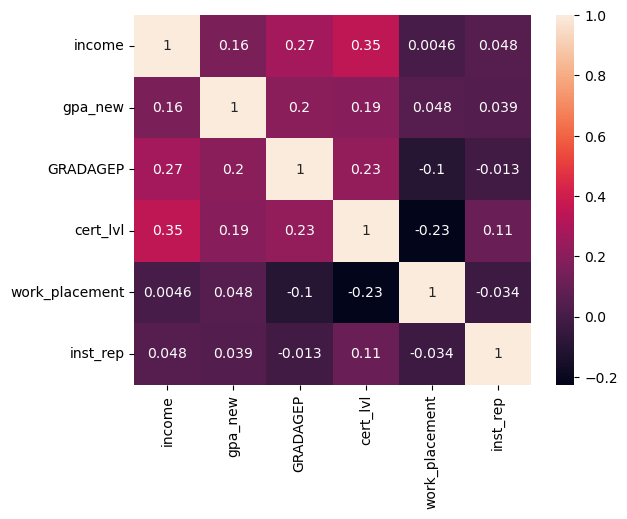

In [7]:
corrMatrix= df[['income', 'gpa_new','GRADAGEP','cert_lvl', 'work_placement', 'inst_rep']].corr()
sns.heatmap(corrMatrix, annot=True) 
plt.show()

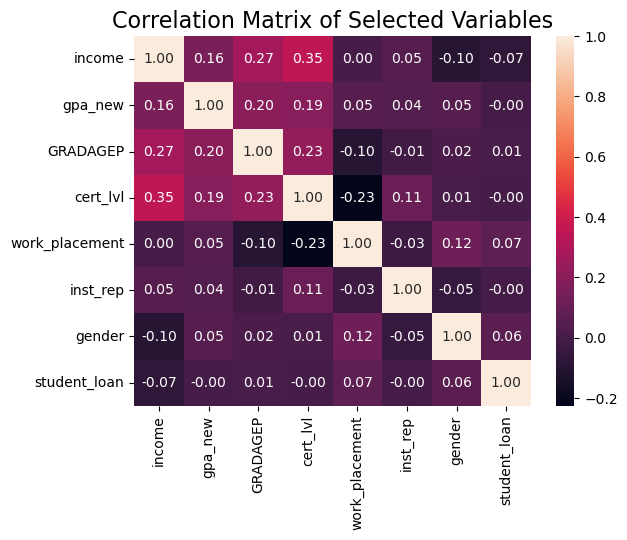

In [8]:
corrMatrix= df[['income', 'gpa_new','GRADAGEP','cert_lvl', 'work_placement', 'inst_rep', 'gender', 'student_loan']].corr()
sns.heatmap(corrMatrix, annot=True, fmt= ".2f") 
plt.title("Correlation Matrix of Selected Variables", fontsize= 16)
plt.show()

In [9]:
#run if you want a list of all the variables 
#df.columns.tolist()

In [10]:
df['gpa_new'].head(10)

0    2.0
1    1.0
2    3.0
3    3.0
4    2.0
5    2.0
6    1.0
7    3.0
8    3.0
9    2.0
Name: gpa_new, dtype: float32

In [11]:
nan_count= [df['income'].isnull().sum(), df['income'].notnull().sum()]
nan_count

[2278, 15207]

In [12]:
nan_count= [df['gpa_new'].isnull().sum(), df['income'].notnull().sum()]
nan_count

[852, 15207]

In [13]:
df['income'].unique()

array([ 5.,  1.,  7.,  6.,  3.,  4., nan,  2., 10.,  8.,  9.])

In [14]:
df_cleaned = df.dropna(subset=['income', 'gpa_new', 'GRADAGEP', 'work_placement', 'inst_rep', 'student_loan', 'gender', 'program' ])

# Extract cleaned columns
income_cleaned = df_cleaned['income']
gpa_new_cleaned = df_cleaned['gpa_new']
grad_age_cleaned= df_cleaned['GRADAGEP']

X = df_cleaned[['gpa_new', 'GRADAGEP']]  # Include all independent variables

X = sm.add_constant(X)  # Add constant term

# Fit OLS regression model
model = sm.OLS(income_cleaned, X).fit(cov='H2')

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     687.1
Date:                Fri, 22 Mar 2024   Prob (F-statistic):          9.24e-286
Time:                        09:04:54   Log-Likelihood:                -33811.
No. Observations:               14448   AIC:                         6.763e+04
Df Residuals:                   14445   BIC:                         6.765e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9790      0.090     33.057      0.0

In [15]:
X = df_cleaned[['gpa_new', 'GRADAGEP', 'work_placement', 'inst_rep', 'student_loan', 'gender']]   # Select independent variables
y= df_cleaned['income']  # Dependent variable

# Add constant to the independent variables
X = sm.add_constant(X)

# Fit OLS regression model
model = sm.OLS(y, X).fit(cov='H2')

# Print regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     290.2
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:04:54   Log-Likelihood:                -33645.
No. Observations:               14448   AIC:                         6.730e+04
Df Residuals:                   14441   BIC:                         6.736e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.6463      0.122     29.

In [16]:
X= pd.get_dummies
X = pd.get_dummies(df_cleaned[['gpa_new', 'GRADAGEP', 'work_placement', 'inst_rep', 'student_loan', 'gender', 'program']], drop_first=True)

# Add constant to the independent variables
X = sm.add_constant(X)

# Dependent variable
y = df_cleaned['income']

# Fit OLS regression model
model = sm.OLS(y, X).fit(cov='H2')

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     261.9
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:04:54   Log-Likelihood:                -33603.
No. Observations:               14448   AIC:                         6.722e+04
Df Residuals:                   14440   BIC:                         6.728e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.1919      0.132     24.

In [17]:
import os 
os.chdir("/Applications/Stata/utilities")
from pystata import config
config.init("se")

[0.076s][warning][os,thread] Attempt to protect stack guard pages failed (0x0000000169178000-0x0000000169184000).
[0.076s][warning][os,thread] Attempt to deallocate stack guard pages failed.

  ___  ____  ____  ____  ____ ©
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring 12 Feb 2025
Serial number: 401809302814
  Licensed to: Khashayar Zare
               Carleton university

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000; see help set_maxvar.


In [18]:
%%stata
use "/Users/khashayarzare/Desktop/Carleton University/Capstone 2024/data/ngs-81M0011-E-2018_F1.dta"

reg income gpa_new


. use "/Users/khashayarzare/Desktop/Carleton University/Capstone 2024/data/ngs-
> 81M0011-E-2018_F1.dta"

. 
. reg income gpa_new

      Source |       SS           df       MS      Number of obs   =    14,503
-------------+----------------------------------   F(1, 14501)     =    387.58
       Model |  2611.38413         1  2611.38413   Prob > F        =    0.0000
    Residual |  97701.7308    14,501  6.73758574   R-squared       =    0.0260
-------------+----------------------------------   Adj R-squared   =    0.0260
       Total |  100313.115    14,502  6.91719176   Root MSE        =    2.5957

------------------------------------------------------------------------------
      income | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     gpa_new |   .7027891   .0356978    19.69   0.000     .6328168    .7727614
       _cons |   3.665142   .0901162    40.67   0.000     3.488502    3.84178

In [33]:
# Drop NaN values from specified columns
df_cleaned = df.dropna(subset=['income', 'gpa_new', 'GRADAGEP', 'work_placement', 'inst_rep', 'student_loan', 'gender', 'program', 'occup'])

# Convert categorical variables into dummy variables
df_dummies = pd.get_dummies(df_cleaned[['occup']], drop_first=True)

# Combine dummy variables with other independent variables
X = pd.concat([df_cleaned[['gpa_new', 'GRADAGEP', 'work_placement', 'inst_rep', 'student_loan', 'gender','program']], df_dummies], axis=1)

# Add constant to the independent variables
X = sm.add_constant(X)

# Dependent variable
y = df_cleaned['income']

# Fit OLS regression model
model = sm.OLS(y, X).fit(cov_type='HC2')  # Use robust standard errors (HC2)

# Print regression summary
print(model.summary(summary2 =False))

TypeError: RegressionResults.summary() got an unexpected keyword argument 'summary2'

In [20]:
# Extract coefficients for each category of the occupation variable
occupation_coefs = model.params.loc[df_dummies.columns]

# Print coefficients for each category of the occupation variable
print("Coefficients for each category of the occupation variable:")
print(occupation_coefs)

Coefficients for each category of the occupation variable:
occup   -0.229247
dtype: float64


In [28]:
model = sm.OLS(y, X).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     326.2
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:20:37   Log-Likelihood:                -28714.
No. Observations:               12688   AIC:                         5.745e+04
Df Residuals:                   12679   BIC:                         5.751e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.4524      0.142     31.